4
 0 : 202 dots
 1 : 117 dots
 2 : 126 dots
 3 : 126 dots


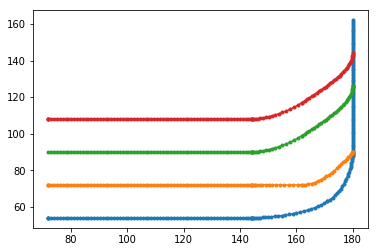

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from svg.path import parse_path
from svg.path.path import Line
from xml.dom import minidom

def line_splitter(start, end):
    return (lambda t: (1-t)*start+t*end)

def cubic_bezier_converter(start, control1, control2, end):
    original_data = np.array([start, control1, control2, end])
    cubic_bezier_matrix = np.array([
        [-1,  3, -3,  1],
        [ 3, -6,  3,  0],
        [-3,  3,  0,  0],
        [ 1,  0,  0,  0]
    ])
    return_data = cubic_bezier_matrix.dot(original_data)

    return (lambda t: np.array([t**3, t**2, t, 1]).dot(return_data))

# Learned from
# https://stackoverflow.com/questions/36971363/how-to-interpolate-svg-path-into-a-pixel-coordinates-not-simply-raster-in-pyth


doc = minidom.parse('LaneMap2.svg')
path_strings = [path.getAttribute('d') for path
                in doc.getElementsByTagName('path')]
doc.unlink()

points_np_all=[]
points_np_all=np.empty((len(path_strings)),dtype=object)
print(len(points_np_all))
#points_np_all[k]=np.array([])

for k in range(len(path_strings)):
#for path_string in path_strings:
    path = parse_path(path_strings[k])
    points_np_merge=np.empty((0,2), float)
    #points_np_merge=np.empty(points_np_merge)
    for dat in path:

#path=parse_path(path_strings[block])

#dat=path[key]

        if type(dat).__name__=='CubicBezier':
            start_np = np.array([dat.start.real, dat.start.imag])
            control1_np = np.array([dat.control1.real, dat.control1.imag])
            control2_np = np.array([dat.control2.real, dat.control2.imag])
            end_np = np.array([dat.end.real, dat.end.imag])
            converted_curve = cubic_bezier_converter(start_np, control1_np, control2_np, end_np)
            # 
            diff_np=start_np-end_np
            n_dots=np.round(np.linalg.norm(diff_np))
            # 
            points_np = np.array([converted_curve(t) for t in np.linspace(0, 1, n_dots)])
        elif type(dat).__name__=='Line':
            start_np = np.array([dat.start.real, dat.start.imag])
            end_np = np.array([dat.end.real, dat.end.imag])
            converted_line = line_splitter(start_np,end_np)
            # 
            diff_np=start_np-end_np
            n_dots=np.round(np.linalg.norm(diff_np))
            #     
            points_np=np.array([converted_line(t) for t in np.linspace(0, 1, n_dots)])
        elif type(dat).__name__=='Move':
            # 
            n_dots=1
            # 
            start_np = np.array([dat.start.real, dat.start.imag])
            end_np = np.array([dat.end.real, dat.end.imag])
            points_np = np.array([start_np,end_np])
        else:
            points_np=np.array([])
        #points_np_merge=np.concatenate(points_np_merge,points_np)
        points_np_merge=np.append(points_np_merge, points_np, axis=0)
#         if k==0:
#             points_np_merge=points_np
#         else:
#             points_np_merge=np.append(points_np_merge,points_np,axis=0)
        #plt.plot(points_np[:, 0], points_np[:, 1], '.-')
        #plt.show()
        #print(len(points_np))
        #print(len(points_np_merge))
    #points_np_all1=points_np_all1.append(points_np_merge)
    #points_np_all=points_np_merge
    points_np_all[k]= points_np_merge
#     points_np_all=points_np_all.append(points_np_merge)
    #print(len(points_np_all))
    print(' %d : %d dots' % (k,len(points_np_merge)))
    #plt.plot(points_np_merge[:, 0], points_np_merge[:, 1], '.-')
    #plt.show()


len(points_np_all)

len(points_np_all)
for k in range(len(points_np_all)):
    points_np=points_np_all[k]
    plt.plot(points_np[:, 0], points_np[:, 1], '.-')
plt.show()
    

In [20]:
import pandas as pd
# points_np.to_csv('to_csv_out_columns.csv')

df = pd.DataFrame({'x1': points_np[:,0],'y1': points_np[:,1],
                   'x2': points_np[:,0],'y2': points_np[:,1],
                   'x3': points_np[:,0],'y3': points_np[:,1],})
print(df)
df.to_csv('to_csv_out_columns.csv')

             x1          y1          x2          y2          x3          y3
0     72.000000  108.000000   72.000000  108.000000   72.000000  108.000000
1     72.000000  108.000000   72.000000  108.000000   72.000000  108.000000
2     72.000000  108.000000   72.000000  108.000000   72.000000  108.000000
3     73.014085  108.000000   73.014085  108.000000   73.014085  108.000000
4     74.028169  108.000000   74.028169  108.000000   74.028169  108.000000
..          ...         ...         ...         ...         ...         ...
121  179.569803  140.516129  179.569803  140.516129  179.569803  140.516129
122  179.755295  141.387097  179.755295  141.387097  179.755295  141.387097
123  179.890034  142.258065  179.890034  142.258065  179.890034  142.258065
124  179.972206  143.129032  179.972206  143.129032  179.972206  143.129032
125  180.000000  144.000000  180.000000  144.000000  180.000000  144.000000

[126 rows x 6 columns]


In [15]:
len(points_np)

126

In [34]:
data={'x1': points_np[:,0],'y1': points_np[:,1]}
data=data.append({'x1': points_np[:,0],'y1': points_np[:,1]})
# data=data.append({'x1': points_np[:,0],'y1': points_np[:,1]})

merge_df = pd.DataFrame([], columns=merge_df.keys())

for k in range(len(points_np_all)):
    points_np=points_np_all[k]

    merge_df = merge_df.append('x1': points_np[:,0], ignore_index=True)


SyntaxError: invalid syntax (<ipython-input-34-47be6a1e5b6b>, line 10)

In [47]:
from time import time
import pandas as pd

len(data)
label=[]
for k in range(len(points_np_all)):
    label=label.append('x1','y1')

dat_df = pd.DataFrame([],columns=['x1', 'y1'])
dat_df[0]={'x1': points_np[:,0],'y1': points_np[:,1]}
dat_df[1]={'x1': points_np[:,0],'y1': points_np[:,1]}
# data=data.append({'x1': points_np[:,0],'y1': points_np[:,1]})
dat_df[1]

x1    x1
y1    y1
Name: 1, dtype: object

In [76]:
label=np.empty([],dtype='unicode')
print(label.size)
label=[]
for k in range(len(points_np_all)): 
    xlabel="x%d"%(k+1)
    ylabel="y%d"%(k+1)
#     label=np.append(label,['x1','y1'])
    label=np.append(label,[xlabel,ylabel])
dat_df = pd.DataFrame([],columns=label)
for k in range(len(points_np_all)):
    points_np=points_np_all[k]
    dat_df[0]={'x1': points_np[:,0],'y1': points_np[:,1]}
#     label=np.append(label,'y1')

1


In [205]:
label=np.empty([],dtype='unicode')
print("label size = %d" % (label.size))
label=[]
for k in range(len(points_np_all)): 
    label=np.append(label,["x%d"%(k+1),"y%d"%(k+1)])
dat_df = pd.DataFrame([],columns=label)
for k in range(len(points_np_all)):
    points_np=points_np_all[k]
    print("%d: size = %d (length= %d)(shape= %s)" %(k,points_np.size,len(points_np),(points_np.shape)))
    #dat_df[0]={'x1': points_np[:,0],'y1': points_np[:,1]}
#     label=np.append(label,'y1')

label size = 1
0: size = 404 (length= 202)(shape= (202, 2))
1: size = 234 (length= 117)(shape= (117, 2))
2: size = 252 (length= 126)(shape= (126, 2))
3: size = 252 (length= 126)(shape= (126, 2))


In [225]:
maxL=max(len(points_np_all[k]) for k in range(len(points_np_all)))
print(maxL)
k=0
points_np=points_np_all[2]
g0=np.zeros([202,2])
tmp0=np.zeros([maxL,2])

print(len(g0))
print((g0.shape))
print(points_np.shape[0])
g0[0:126,:]=points_np
tmp0[0:points_np.shape[0],:]=points_np
print(len(tmp0))
print((tmp0.shape))
dat_df = pd.DataFrame([],columns=label)
dat_df["x1"]=tmp0[:,0]
dat_df["y1"]=tmp0[:,1]
dat_df
# tempdict={'x1':points_np_all[0][:,0],'y1':points_np_all[0][:,1],'x2':points_np_all[1][:,0],'y2':points_np_all[1][:,1],'x3':points_np_all[2][:,0],'y3':points_np_all[2][:,1],'x4':points_np_all[3][:,0],'y4':points_np_all[1][:,1]}
dat_df
# g2
# pd.DataFrame((2,3))

202
202
(202, 2)
126
202
(202, 2)


,x1,y1,x2,y2,x3,y3,x4,y4
0,180.000000,126.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,180.000000,126.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,180.000000,126.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,179.972206,125.129032,NaN,NaN,NaN,NaN,NaN,NaN
4,179.890034,124.258065,NaN,NaN,NaN,NaN,NaN,NaN
5,179.755295,123.387097,NaN,NaN,NaN,NaN,NaN,NaN
6,179.569803,122.516129,NaN,NaN,NaN,NaN,NaN,NaN
7,179.335370,121.645161,NaN,NaN,NaN,NaN,NaN,NaN
8,179.053808,120.774194,NaN,NaN,NaN,NaN,NaN,NaN
9,178.726931,119.903226,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
maxL=max(len(points_np_all[k]) for k in range(len(points_np_all)))

label=np.empty([],dtype='unicode')
print("label size = %d" % (label.size))
label=[]
for k in range(len(points_np_all)): 
    label=np.append(label,["x%d"%(k+1),"y%d"%(k+1)])
dat_df = pd.DataFrame([],columns=label)
for k in range(len(points_np_all)):
    points_np=points_np_all[k]
    tmp0=np.zeros([maxL,2])
    tmp0[0:points_np.shape[0],:]=points_np
    dat_df["x%d"%(k+1)] = tmp0[:,0]
    dat_df["y%d"%(k+1)] = tmp0[:,1]
    
print(dat_df.shape)
dat_df

label size = 1
(202, 8)


,x1,y1,x2,y2,x3,y3,x4,y4
0,72.000000,54.000000,72.000000,72.0,180.000000,126.000000,72.000000,108.0
1,72.000000,54.000000,72.000000,72.0,180.000000,126.000000,72.000000,108.0
2,72.000000,54.000000,72.000000,72.0,180.000000,126.000000,72.000000,108.0
3,73.014085,54.000000,73.014085,72.0,179.972206,125.129032,73.014085,108.0
4,74.028169,54.000000,74.028169,72.0,179.890034,124.258065,74.028169,108.0
5,75.042254,54.000000,75.042254,72.0,179.755295,123.387097,75.042254,108.0
6,76.056338,54.000000,76.056338,72.0,179.569803,122.516129,76.056338,108.0
7,77.070423,54.000000,77.070423,72.0,179.335370,121.645161,77.070423,108.0
8,78.084507,54.000000,78.084507,72.0,179.053808,120.774194,78.084507,108.0
9,79.098592,54.000000,79.098592,72.0,178.726931,119.903226,79.098592,108.0


In [234]:
dat_df.to_csv('to_csv.csv')

In [199]:
tempdict={'x1':points_np_all[0][:,0],'y1':points_np_all[0][:,1],'x2':points_np_all[1][:,0],'y2':points_np_all[1][:,1],'x3':points_np_all[2][:,0],'y3':points_np_all[2][:,1],'x4':points_np_all[3][:,0],'y4':points_np_all[1][:,1]}
len(tempdict)
# tempdict
# pd.DataFrame(tempdict)

8

In [77]:
label


array(['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4'], dtype='<U32')

In [232]:
dat_df

,x1,y1,x2,y2,x3,y3,x4,y4
0,72.000000,54.000000,72.000000,72.0,180.000000,126.000000,72.000000,108.0
1,72.000000,54.000000,72.000000,72.0,180.000000,126.000000,72.000000,108.0
2,72.000000,54.000000,72.000000,72.0,180.000000,126.000000,72.000000,108.0
3,73.014085,54.000000,73.014085,72.0,179.972206,125.129032,73.014085,108.0
4,74.028169,54.000000,74.028169,72.0,179.890034,124.258065,74.028169,108.0
5,75.042254,54.000000,75.042254,72.0,179.755295,123.387097,75.042254,108.0
6,76.056338,54.000000,76.056338,72.0,179.569803,122.516129,76.056338,108.0
7,77.070423,54.000000,77.070423,72.0,179.335370,121.645161,77.070423,108.0
8,78.084507,54.000000,78.084507,72.0,179.053808,120.774194,78.084507,108.0
9,79.098592,54.000000,79.098592,72.0,178.726931,119.903226,79.098592,108.0


In [ ]:
# Pythonの文字列フォーマット（formatメソッドの使い方）
# https://gammasoft.jp/blog/python-string-format/